In [2]:



import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load pretrained MobileNetV2 model
model = MobileNetV2(weights='imagenet')


def extract_frames(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video")
        return np.array([])

    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Decide step size to evenly sample frames
    if total_frames > 0:
        step = max(1, total_frames // max_frames)
    else:
        step = 1

    count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if count % step == 0:
            frame = cv2.resize(frame, (224, 224))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)

        count += 1

        if len(frames) >= max_frames:
            break

    cap.release()
    print("Extracted frames:", len(frames))
    return np.array(frames)


def classify_video(video_path):
    frames = extract_frames(video_path)

    if len(frames) == 0:
        print("No frames extracted!")
        return

    # Preprocess frames
    frames = preprocess_input(frames)

    # Predict
    predictions = model.predict(frames)

    # Average predictions across frames
    avg_pred = np.mean(predictions, axis=0)

    # Decode top 5 predictions
    top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=5)

    print("\nTop 5 Predictions:\n")
    for pred in top_pred[0]:
        print(pred[1], ":", round(pred[2] * 100, 2), "%")

    print("\nFinal Prediction:", top_pred[0][0][1])


# ✅ Your video path in Colab
video_path = "/content/real_world_demo_video.mp4"

classify_video(video_path)

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Extracted frames: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Top 5 Predictions:

digital_clock : 63.84 %
traffic_light : 9.13 %
switch : 1.43 %
computer_keyboard : 1.32 %
matchstick : 0.85 %

Final Prediction: digital_clock


--- DEDICATED VIDEO DATA ---
Resolution: 854x480 | FPS: 24.00 | Total Frames: 192



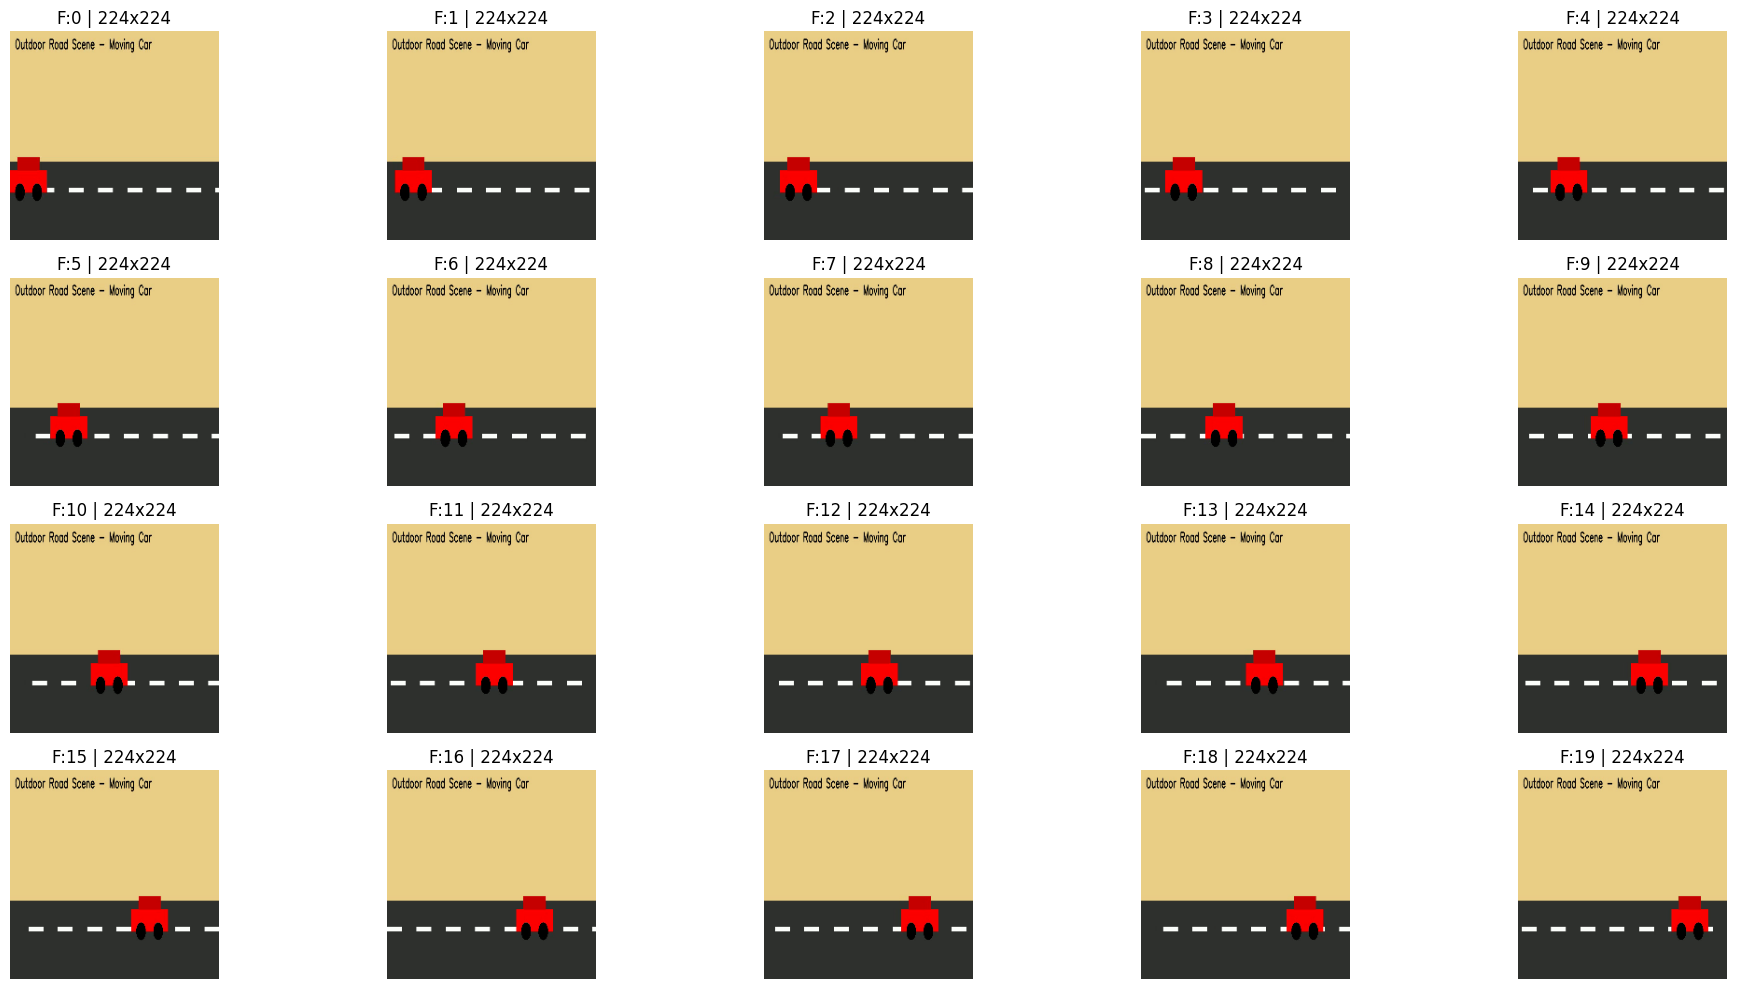

--- PIXEL MATRIX DATA (Frame 19) ---
[[[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]

 [[233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]
  [233 206 133]]]


In [12]:

def analyze_and_show_video(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)

    # 1. Get Dedicated Video Data (Metadata)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    original_w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print(f"--- DEDICATED VIDEO DATA ---")
    print(f"Resolution: {original_w}x{original_h} | FPS: {fps:.2f} | Total Frames: {total_frames}\n")

    # 2. Extract Frames
    frames = []
    step = max(1, total_frames // max_frames)
    for i in range(max_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
        ret, frame = cap.read()
        if not ret: break
        # Resize to 224x224 as per your MobileNet requirement
        frame = cv2.resize(frame, (224, 224))
        frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    cap.release()

    # 3. Show Frames with Dimensions (Your Style)
    plt.figure(figsize=(20, 10))
    for i in range(len(frames)):
        h, w, _ = frames[i].shape
        plt.subplot(4, 5, i + 1)
        plt.imshow(frames[i])
        plt.title(f"F:{i} | {w}x{h}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # 4. Display Pixel Matrix for the Last Captured Frame
    print(f"--- PIXEL MATRIX DATA (Frame {len(frames)-1}) ---")
    # Show a 5x5 slice of the RGB values
    print(frames[-1][0:5, 0:5])

# Run the analysis
analyze_and_show_video(video_path)
